# 課題10

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot  as plt
%matplotlib inline
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA


## Question
データ分析の実践のノートブックで使用したデータセットについて、特徴量の選択、特徴量の変換や組み合わせによる新たな特徴量の生成、などを行い、それらの特徴量を用いたモデルの学習と評価を行ってください。モデルは`LinearRegression`を使ってください。

どのような着想の元で特徴量の選択や作成を行ったのかについても報告してください。各自の報告を次回の授業内で紹介することがあるかもしれませんが、憚られる方はその旨も記載しておいてください。

以下では例として、`alcohol`と`sulphates`の特徴量に加えて、それらの特徴量を掛け合わせた交差項となる特徴量を新たに作成し、これらの特徴量を用いてモデルの学習と評価を行っています。

 以下が課題のコードです

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
df.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


KeyboardInterrupt: 

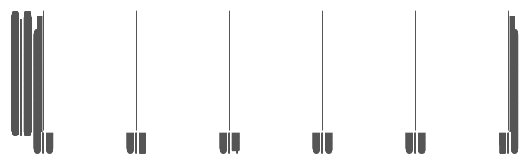

In [4]:
plt.style.use('ggplot')
df.T.plot(kind="bar", subplots=True, ylim=(0,0.15))

In [ ]:
df.drop_duplicates()

In [ ]:
y = df['quality']
df = df.drop("quality", axis=1)
X = df.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [8]:
output = {}

In [9]:
# 標準化あり

# 標準化
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = PCA(n_components=9)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_val_scaled_pca = pca.transform(X_val_scaled)

clf = LinearRegression()
lr = clf.fit(X_train_scaled_pca, y_train)
y_pred = clf.predict(X_val_scaled_pca)
output['MM:PCA(1):LR'] = mean_squared_error(y_val, y_pred)

/Users/fujiki/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


このマークダウンセルに説明を記入してください（セルをダブルクリックすると編集できます）
+ 整理すると今回のデータセットは11の特徴量が与えられ、そこからワインの"quality"を予測する問題である。
+ データに重複があったので、pd.drop_duplicates()で重複データを落とした。
+ モデルはLenearRegressionを使用。LassoやRidgeを使いたかったが、今回は問題でモデルが指定されていたため、同様に特徴量をうまく絞ってくれるPCAを学習の前にかませた。
+ 訓練データ:検証データを7:3に分割。これで検証データに対してもっとも精度がよいものを採用した。
とくにPCAのn_component引数をいろいろ試したが、n_component=9でもっとも精度がよかったのでこれを採用した。

[疑問点]
LenearRegressionをする前に標準化StandardScalerかけてもかけなくてもスコアが変わらなかったが、これはなぜだろうか。コードは以下。（最後のcellのoutput辞書のoutput['LR']とoutput['SS:LR']の誤差が同じ）

In [10]:
# 標準化しないでclfを作成
clf = LinearRegression()
lr = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
output['LR'] = mean_squared_error(y_pred, y_val)

In [11]:
# 標準化してPipeline作成
pipe = Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
output['SS:LR'] = mean_squared_error(y_pred, y_val)

In [12]:
output

{'LR': 0.4334520540267978,
 'MM:PCA(1):LR': 0.43352134665643977,
 'SS:LR': 0.4334520540268001}